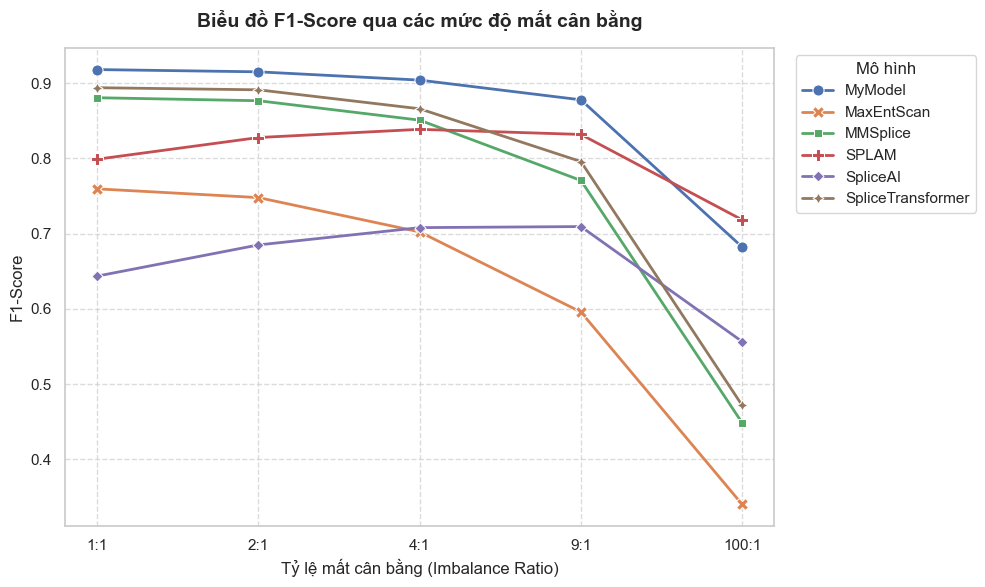

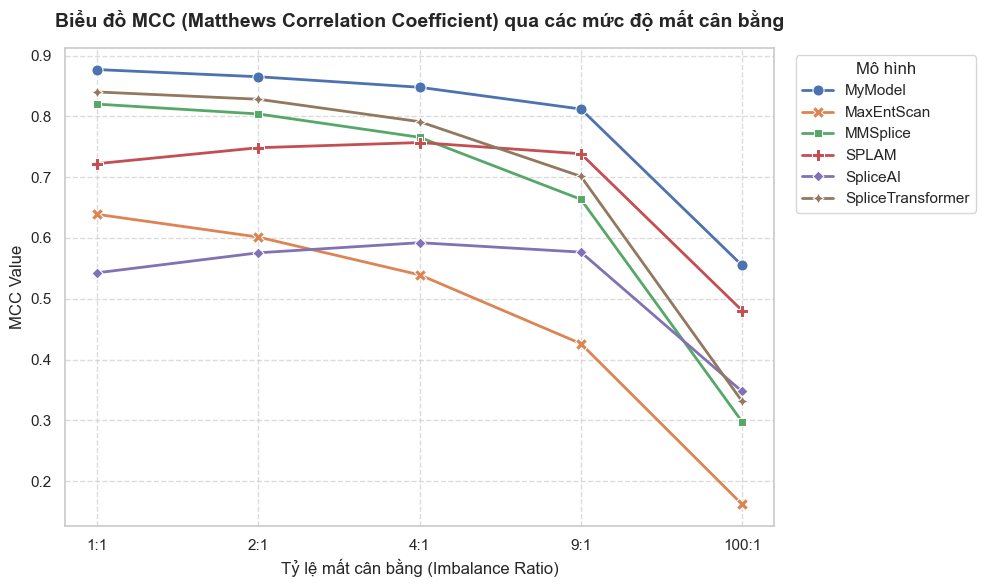

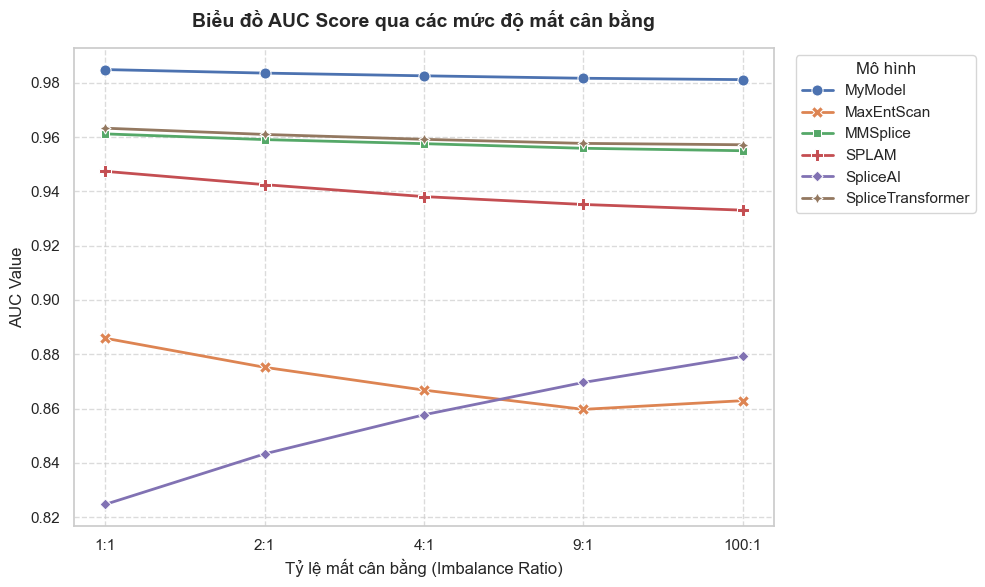

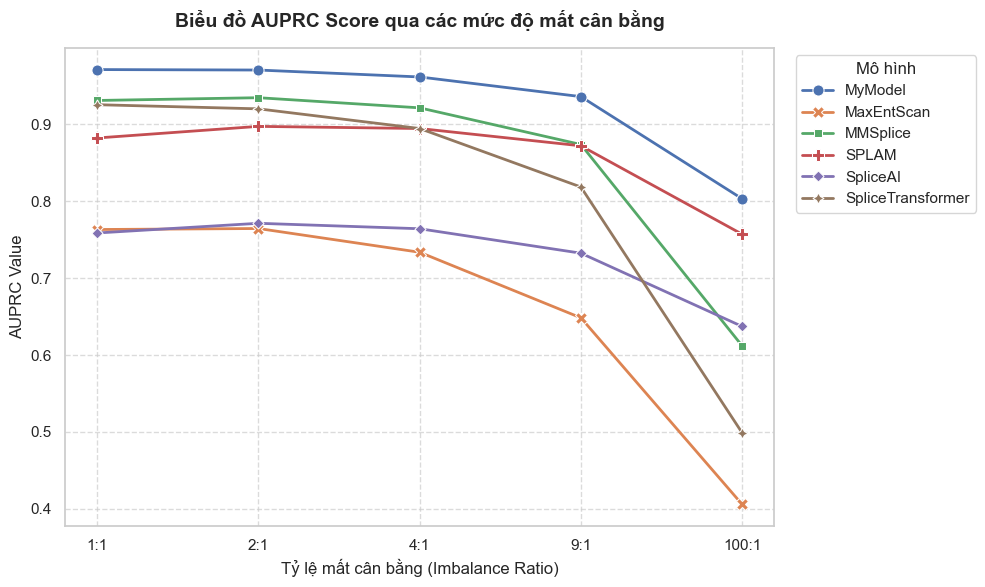

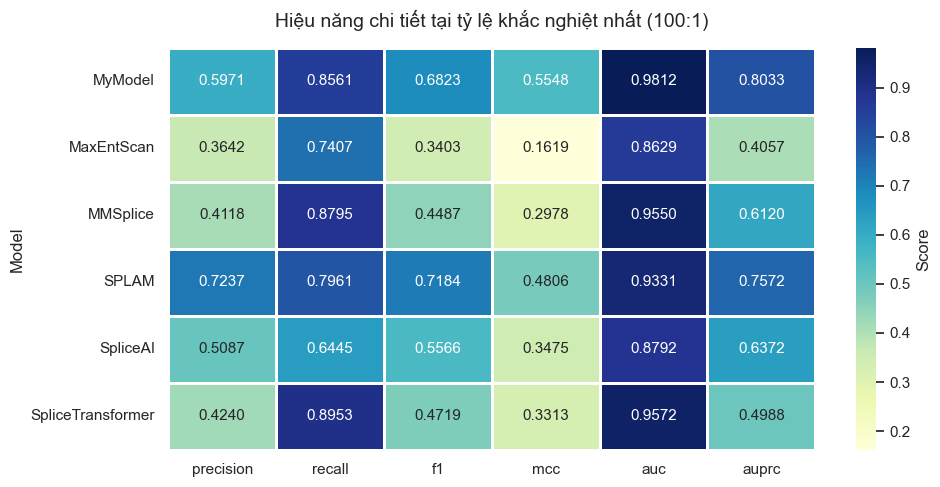

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read data
try:
    with open('data.json', 'r') as f:
        data = json.load(f)
except FileNotFoundError:
    print("Error: data.json not found. Please make sure the JSON file is saved.")
    exit()

# 2. Process data
rows = []
for ratio_key, models in data.items():
    # Convert label key (e.g., "9_1_1") to a readable format ("9:1")
    # Logic: replace the first underscore with a colon, and remove the trailing _1 part
    parts = ratio_key.split('_')
    if len(parts) >= 2:
        ratio_label = f"{parts[0]}:{parts[1]}" # Takes the first 2 numbers, e.g., 9:1
    else:
        ratio_label = ratio_key

    for model_name, metrics in models.items():
        row = metrics.copy()
        row['Model'] = model_name
        row['Ratio'] = ratio_label
        rows.append(row)

df = pd.DataFrame(rows)

# --- IMPORTANT: Define the order on the X-axis ---
# Ensure 9:1 is placed correctly between 4:1 and 100:1
ratio_order = ["1:1", "2:1", "4:1", "9:1", "100:1"]

# 3. Global plot configuration
sns.set_theme(style="whitegrid")
plt.rcParams.update({'font.size': 11})

def plot_metric_trend(metric_name, title_metric, ylabel):
    plt.figure(figsize=(10, 6))
    
    # Draw Line plot
    sns.lineplot(
        data=df, 
        x='Ratio', 
        y=metric_name, 
        hue='Model', 
        style='Model', 
        markers=True, 
        dashes=False,
        linewidth=2,
        markersize=8,
        sort=False # Disable auto-sort to use our custom ratio_order via xticks if needed
    )
    
    # Force X-axis order
    plt.xticks(ticks=range(len(ratio_order)), labels=ratio_order)
    
    # Decorations
    plt.title(f'{title_metric} across Imbalance Ratios', fontsize=14, fontweight='bold', pad=15)
    plt.ylabel(ylabel)
    plt.xlabel('Imbalance Ratio (Negative:Positive)')
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title='Model', frameon=True)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# --- PLOTTING ---

# 1. F1-Score
plot_metric_trend('f1', 'F1-Score', 'F1-Score')

# 2. MCC
plot_metric_trend('mcc', 'MCC (Matthews Correlation Coefficient)', 'MCC Value')

# 3. AUC
plot_metric_trend('auc', 'AUC Score', 'AUC Value')

# 4. AUPRC
plot_metric_trend('auprc', 'AUPRC Score', 'AUPRC Value')

# --- HEATMAP FOR THE HARDEST CASE (100:1) ---
def plot_heatmap_hardest_case():
    target_ratio = "100:1"
    # Filter data
    subset = df[df['Ratio'] == target_ratio].copy()
    
    if subset.empty:
        print(f"No data found for ratio {target_ratio}")
        return

    subset = subset.set_index('Model')
    
    # Select metrics to display
    cols_to_show = ['precision', 'recall', 'f1', 'mcc', 'auc', 'auprc']
    subset = subset[cols_to_show]
    
    plt.figure(figsize=(10, 5))
    sns.heatmap(subset, annot=True, fmt=".4f", cmap="YlGnBu", linewidths=1, linecolor='white', cbar_kws={'label': 'Score'})
    plt.title(f'Performance Metrics at Extreme Ratio ({target_ratio})', fontsize=14, pad=15)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

plot_heatmap_hardest_case()